In [40]:
from sklearn.ensemble import RandomForestRegressor

from FQI_agent import collect_samples, rf_fqi
from env_hiv import HIVPatient
from utils import greedy_action_FQI
import pickle
import gzip
import numpy as np

In [41]:
environment = HIVPatient()

## 1

In [42]:
S,A,R,S2,D = collect_samples(environment, int(2e4))
print("nb of collected samples:", S.shape[0])
for i in range(3):
    print("sample", i, "\n  state:", S[i], "\n  action:", A[i], "\n  reward:", R[i], "\n  next state:", S2[i], "\n terminal?", D[i])

100%|██████████| 20000/20000 [05:09<00:00, 64.63it/s]

nb of collected samples: 20000
sample 0 
  state: [1.63573e+05 1.19450e+04 5.00000e+00 4.60000e+01 6.39190e+04 2.40000e+01] 
  action: [0] 
  reward: 17608.1 
  next state: [1.63572059e+05 1.19450569e+04 4.99536372e+00 4.56109782e+01
 6.39192996e+04 2.39127429e+01] 
 terminal? False
sample 1 
  state: [1.63572059e+05 1.19450569e+04 4.99536372e+00 4.56109782e+01
 6.39192996e+04 2.39127429e+01] 
  action: [3] 
  reward: 5920.812904409093 
  next state: [2.00983817e+05 8.59608813e+02 5.61270607e+01 2.70185509e+01
 3.46008271e+03 2.62664293e+01] 
 terminal? False
sample 2 
  state: [2.00983817e+05 8.59608813e+02 5.61270607e+01 2.70185509e+01
 3.46008271e+03 2.62664293e+01] 
  action: [3] 
  reward: 14320.42098089942 
  next state: [2.39620126e+05 7.81125761e+01 1.66754825e+02 9.57468751e+00
 3.39910233e+02 3.46446553e+01] 
 terminal? False


In [45]:
with gzip.open('samples/S-2e4.pkl.gz', 'wb') as file:
    pickle.dump(S, file)
    
with gzip.open('samples/A-2e4.pkl.gz', 'wb') as file:
    pickle.dump(A, file)
    
with gzip.open('samples/R-2e4.pkl.gz', 'wb') as file:
    pickle.dump(R, file)
    
with gzip.open('samples/S2-2e4.pkl.gz', 'wb') as file:
    pickle.dump(S2, file)

with gzip.open('samples/D-2e4.pkl.gz', 'wb') as file:
    pickle.dump(D, file)

In [46]:
with gzip.open('samples/S-2e4.pkl.gz', 'rb') as f:
    S = pickle.load(f)
    
with gzip.open('samples/A-2e4.pkl.gz', 'rb') as f:
    A = pickle.load(f)
    
with gzip.open('samples/R-2e4.pkl.gz', 'rb') as f:
    R = pickle.load(f)
    
with gzip.open('samples/S2-2e4.pkl.gz', 'rb') as f:
    S2 = pickle.load(f)
    
with gzip.open('samples/D-2e4.pkl.gz', 'rb') as f:
    D = pickle.load(f)

In [47]:
SA = np.append(S, A, axis = 1)

In [48]:
value = R.copy()

Q1 = RandomForestRegressor(n_jobs = -1)
Q1.fit(SA, value)
print("training MSE", np.mean((value-Q1.predict(SA))**2))

training MSE 81731.11987599084


## 2

100%|██████████| 60/60 [01:29<00:00,  1.50s/it]


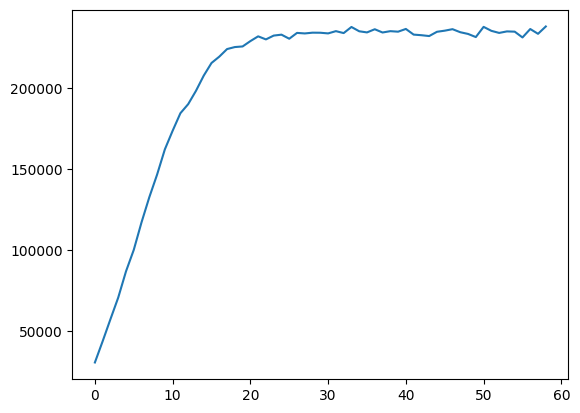

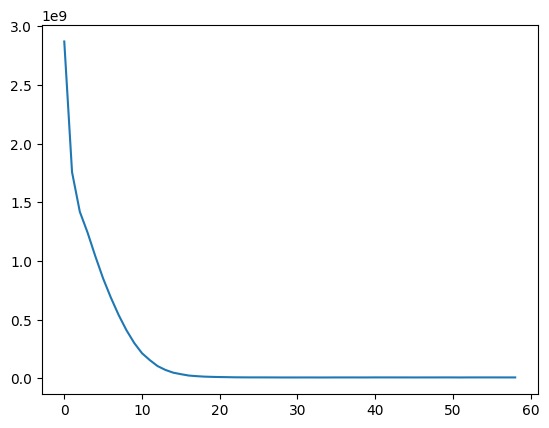

In [65]:
gamma = .8
nb_iter = 60
nb_actions = environment.action_space.n
Qfunctions = rf_fqi(S, A, R, S2, D, nb_iter, nb_actions, gamma, environment)

In [66]:
with gzip.open('FQI_Q_functions.pkl.gz', 'wb') as file:
    pickle.dump(Qfunctions, file)

In [67]:
with gzip.open('FQI_Q_functions.pkl.gz', 'rb') as f:
    QfunctionsLoaded = pickle.load(f)

In [68]:
s,_ = environment.reset()
for t in range(500):
    a = greedy_action_FQI(QfunctionsLoaded,s,environment.action_space.n)
    s2,r,d,trunc,_ = environment.step(a)
    s = s2
    if d:
        break